In [19]:
import pandas as pd
import numpy as np
import pickle
from pandas import ExcelWriter
import ffn
%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

#pull in data from AlphaVantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='NXY0VT9AHBRYGKKC',output_format='pandas')

with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [20]:
DF = b
DF = DF.sort_index()

In [21]:
DF = DF.loc['2017-01-01':]

In [22]:
DF.pct_change(252).tail(10).transpose().to_csv("momentum.csv")

In [23]:
test = b

In [24]:
test['SPY'].dropna().calc_stats().display()

Stats for SPY from 2000-01-03 00:00:00 - 2018-06-26 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
86.71%              0.27  3.44%   -56.47%

Annualized Returns:
mtd    3m     6m     ytd    1y      3y     5y      10y    incep.
-----  -----  -----  -----  ------  -----  ------  -----  --------
0.23%  2.43%  1.63%  1.76%  11.62%  8.97%  11.14%  7.79%  3.44%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.27     0.32       0.33
mean    5.25%    4.66%      5.63%
vol     19.30%   14.37%     17.02%
skew    0.17     -0.56      -1.10
kurt    11.02    1.24       1.53
best    13.96%   10.91%     29.69%
worst   -9.66%   -16.67%    -38.28%

Drawdowns:
max      avg       # days
-------  ------  --------
-56.47%  -2.44%     59.44

Misc:
---------------  ------
avg. up month    2.97%
avg. down month  -3.44%
up year %        72.22%
12m up %         70.

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)


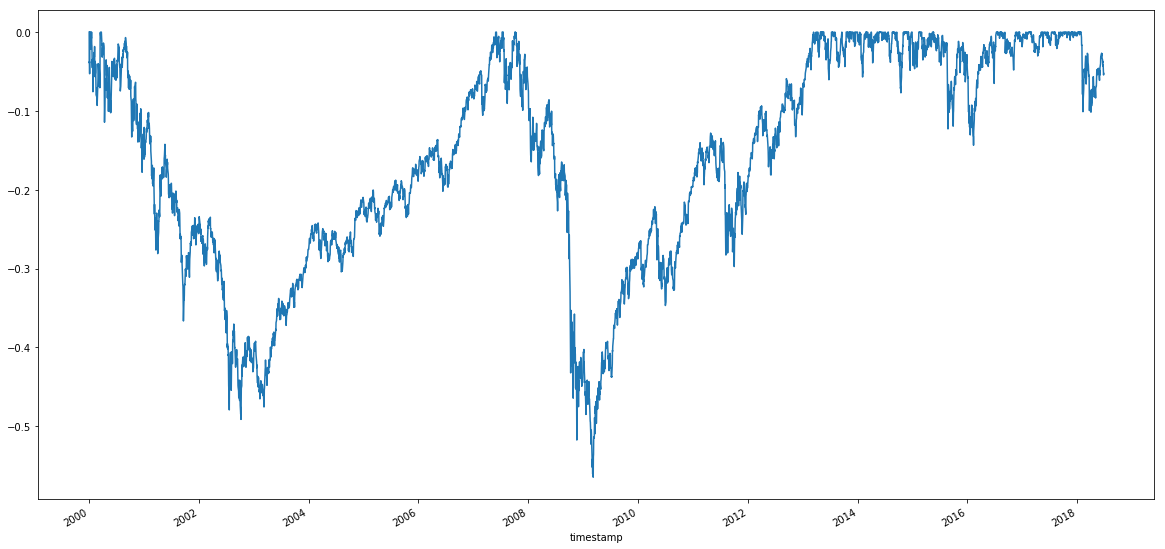

In [25]:
test['SPY'].dropna().to_drawdown_series().plot(figsize = (20,10))